<a href="https://colab.research.google.com/github/Ciss48/Bank_Transaction_Report/blob/main/Customer_Segment_Using_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model phân khúc khách hàng bằng RFM và KMean
Note: Để phân khúc được khách hàng, có 1 vài thước đo quan trọng ta có thể sử dụng:

- R (Recentcy - Gần nhất): Lần cuối khách hàng mua sản phẩm
- F (Frequency - Tần suất):Tần suất khách hàng mua sản phẩm
- M (Montery value - Giá trị mà khách hàng bỏ ra): Khách hàng đã bỏ bao nhiêu tiền để mua sản phẩm

## Import dữ liệu và đọc thư viện


In [13]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

transaction_df = pd.read_csv("transaction_etl.csv")

Saving transaction_etl.csv to transaction_etl.csv


In [19]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Làm sạch dữ liệu và thực hiện EDA, biến đổi dữ liệu để phục vụ đưa vào mô hình


In [15]:
# Bỏ đi null data
transaction_df_no_null = transaction_df.dropna()
len(transaction_df_no_null)

753002

In [17]:
# Mô tả dữ liệu
transaction_df_no_null.describe()

,Số CIF,Tổng số tiền giao dịch,Mã lỗi,Năm,Tháng
count,7.530020e+05,7.530020e+05,753002.000000,753002.0,753002.000000
mean,4.231428e+12,1.501314e+07,0.177152,2024.0,2.053859
std,1.729216e+12,5.699714e+07,4.163163,0.0,0.868641
min,1.000000e+11,0.000000e+00,0.000000,2024.0,1.000000
25%,3.400000e+12,2.000000e+05,0.000000,2024.0,1.000000
50%,4.000000e+12,1.000000e+06,0.000000,2024.0,2.000000
75%,4.400400e+12,5.000000e+06,0.000000,2024.0,3.000000
max,9.410100e+12,5.250029e+09,99.000000,2024.0,4.000000


In [18]:
# Lấy ra sample mẫu 50 000 data, tối ưu hiệu năng và đỡ tốn tài nguyên
transaction_df_no_null_sample = transaction_df_no_null.sample(50000, random_state= 42)
transaction_df_no_null_sample

,Số CIF,Tên khách hàng,Dịch vụ,Tổng số tiền giao dịch,Đơn vị tiền tệ,Mã lỗi,Mô tả mã lỗi,Mã giao dịch,Thời gian giao dịch,Trạng thái,Năm,Tháng,Thời gian trong ngày
749341,6600500015817,PHAM TUAN HUY,Chuyển tiền nhanh 247 qua tài khoản,1000000,VND,0,Hạch toán Thành công,00000FT542406213249,2024-03-02 20:51:35,Giao dịch thành công,2024,3,chiều
246982,3600000068282,PHAM VAN THUY,Chuyển tiền nhanh 247 qua tài khoản,200000,VND,0,Hạch toán Thành công,00000FT542400315601,2024-01-03 11:36:29,Giao dịch thành công,2024,1,sáng
312556,5200000388951,NGUYEN THI TY,Chuyển tiền nhanh 247 qua tài khoản,700000,VND,0,Hạch toán Thành công,00000FT542405617753,2024-02-25 08:05:58,Giao dịch thành công,2024,2,sáng
309333,7500000061321,CAO XUAN AN,Tạo lệnh trả nợ vay chính chủ,14600000,VND,0,Hạch toán Thành công,75000TNMB2405626382,2024-02-25 17:23:21,Giao dịch thành công,2024,2,chiều
270895,6800000062567,NGUYEN THI HONG NHUNG,Thanh toán Qrcode,20000,VND,0,Gạch nợ Thành công,00000FT812406196282,2024-03-01 12:16:50,Giao dịch thành công,2024,3,trưa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651600,2500000036461,HOANG VAN ANH,Chuyển tiền nhanh 247 qua tài khoản,550000,VND,0,Hạch toán Thành công,00000FT542407486646,2024-03-14 09:31:54,Giao dịch thành công,2024,3,sáng
598168,3800000139742,PHAM THANH HUONG,Nạp thẻ điện thoại,50000,VND,0,Gạch nợ Thành công,00000FT692408007419,2024-03-20 14:46:42,Giao dịch thành công,2024,3,chiều
430064,6600000025861,NGUYEN VIET ANH,Chuyển tiền nhanh 247 qua tài khoản,1125000,VND,0,Hạch toán Thành công,00000FT542403791073,2024-02-06 09:13:00,Giao dịch thành công,2024,2,sáng
279785,3400000143648,VU VAN HUAN,Chuyển tiền nhanh 247 qua tài khoản,600000,VND,0,Hạch toán Thành công,00000FT542406073765,2024-02-29 09:51:54,Giao dịch thành công,2024,2,sáng


In [24]:
#Tính toán RFM
# Tính R - Recency
transaction_df_no_null_sample['Thời gian giao dịch'] = pd.to_datetime(transaction_df_no_null_sample['Thời gian giao dịch']) # Chuyển type về date
# Lấy ngày lớn nhất trong InvoiceDate + 1 (để làm ngày hiện tại trừ các ngày mua hàng gần nhất)
current_date = transaction_df_no_null_sample['Thời gian giao dịch'].max() + dt.timedelta(days=1)
# Group by CustomerID để tính R,F,M
df_customers = transaction_df_no_null_sample.groupby('Số CIF').agg({
    'Thời gian giao dịch': lambda x: (current_date - x.max()).days,
    'Mã giao dịch': 'count',
    'Tổng số tiền giao dịch': 'sum'
})
df_customers.head(5)


,Thời gian giao dịch,Mã giao dịch,Tổng số tiền giao dịch
Số CIF,,,
100000000000,39,1,281000000
100000000001,8,7,39807000
100000000024,40,4,2515000
100000000044,16,4,820000000
100000000045,4,17,306272600


In [26]:
# Đổi tên 3 cột
df_customers = df_customers.rename(columns={
    'Thời gian giao dịch': 'Recency',
    'Mã giao dịch': 'Frequency',
    'Tổng số tiền giao dịch': 'MonetaryValue'
})

In [29]:
df_customers

,Recency,Frequency,MonetaryValue
Số CIF,,,
100000000000,39,1,281000000
100000000001,8,7,39807000
100000000024,40,4,2515000
100000000044,16,4,820000000
100000000045,4,17,306272600
...,...,...,...
9400200014541,17,5,2288000
9410000000002,90,1,2000000
9410000000003,14,3,9501471


# Chuẩn hóa dữ liệu, tối ưu điểm Skewness


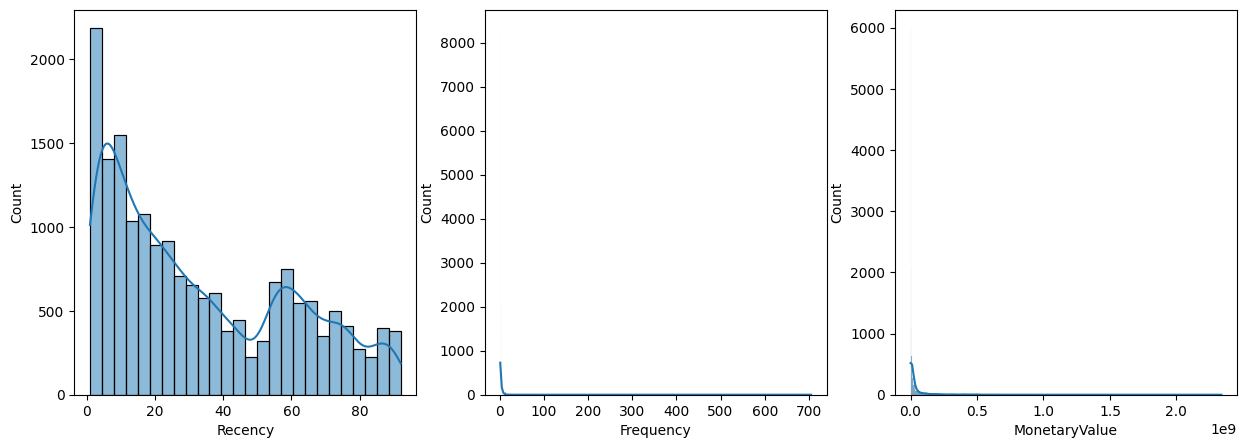

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings('ignore')

# Vẽ phân phối
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_customers['Recency'], kde=True, ax=axs[0])
sns.histplot(df_customers['Frequency'], kde=True, ax=axs[1])
sns.histplot(df_customers['MonetaryValue'], kde=True, ax=axs[2])

# Hiển thị biểu đồ
plt.show()

Các feature đang có phân phối khá bị lệch trái. Việc này sẽ làm cho model hoạt động không tốt => Tiến hành áp dụng 1 trong 4 phương pháp transfrom để đạt được điểm skewness tốt nhất:

- log transformation
- square root transformaion
- box-cox transformation
- cube root transformaion

In [31]:
# Tính toán độ lệch
print(df_customers['Recency'].skew())
print(df_customers['Frequency'].skew())
print(df_customers['MonetaryValue'].skew())

0.5957584507254443
84.49620142953489
5.62547878013153


In [32]:
# => Đang bị lệch phải

In [33]:
# Hàm dùng cả 4 phương pháp để chuẩn hóa
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_skewness(x, customers):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # Vẽ biểu đồ phân phối
    sns.histplot(customers[x], kde=True, ax=ax[0, 0])
    ax[0, 0].set_title(f'Original - {x}')

    sns.histplot(np.log1p(customers[x]), kde=True, ax=ax[0, 1])
    ax[0, 1].set_title(f'Log Transformation - {x}')

    sns.histplot(np.sqrt(customers[x]), kde=True, ax=ax[1, 0])
    ax[1, 0].set_title(f'Square Root Transformation - {x}')

    sns.histplot(pd.Series(stats.boxcox(customers[x] + 1)[0]), kde=True, ax=ax[1, 1])
    ax[1, 1].set_title(f'Box-Cox Transformation - {x}')

    plt.tight_layout()
    plt.show()

    # Tính skewness cho từng phương pháp
    original_skew = customers[x].skew().round(2)
    log_skew = np.log1p(customers[x]).skew().round(2)
    sqrt_skew = np.sqrt(customers[x]).skew().round(2)
    boxcox_skew = pd.Series(stats.boxcox(customers[x] + 1)[0]).skew().round(2)

    # In kết quả skewness
    print(f"Skewness (Original): {original_skew}")
    print(f"Skewness (Log Transformation): {log_skew}")
    print(f"Skewness (Square Root Transformation): {sqrt_skew}")
    print(f"Skewness (Box-Cox Transformation): {boxcox_skew}")

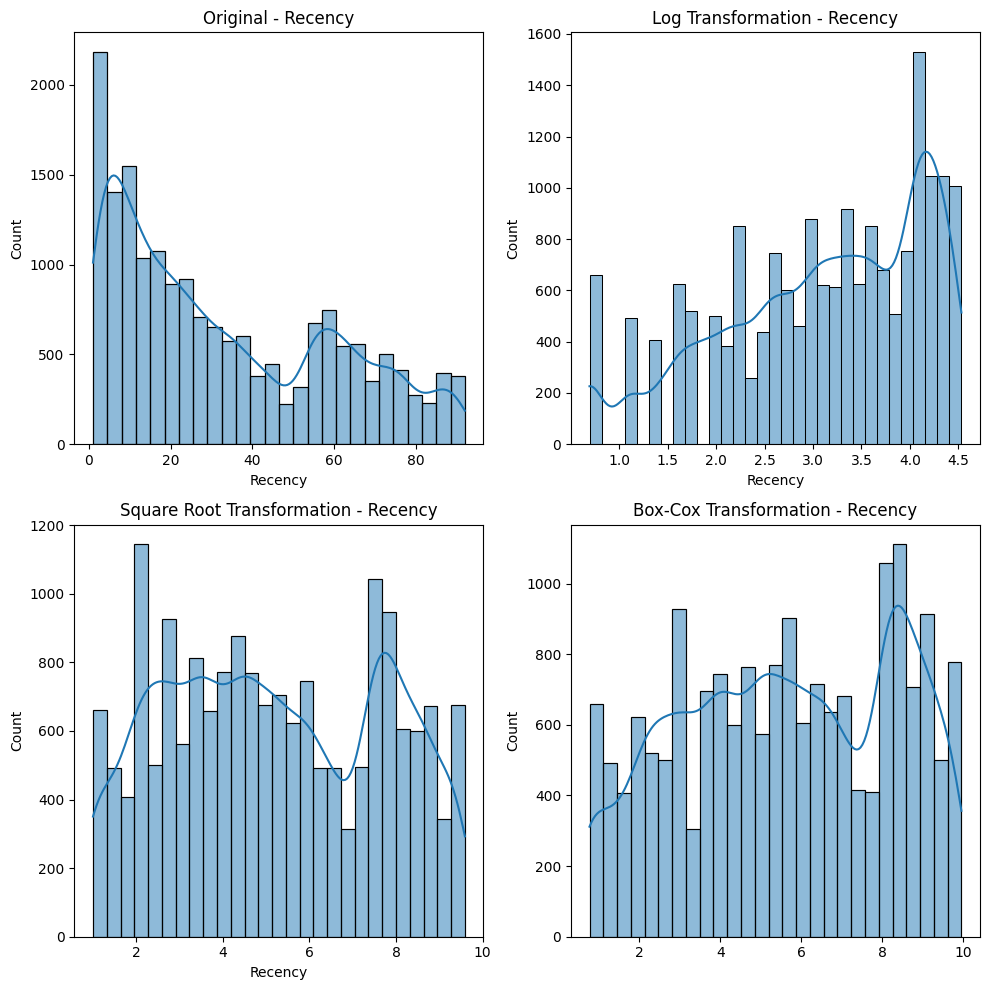

Skewness (Original): 0.6
Skewness (Log Transformation): -0.58
Skewness (Square Root Transformation): 0.07
Skewness (Box-Cox Transformation): -0.12


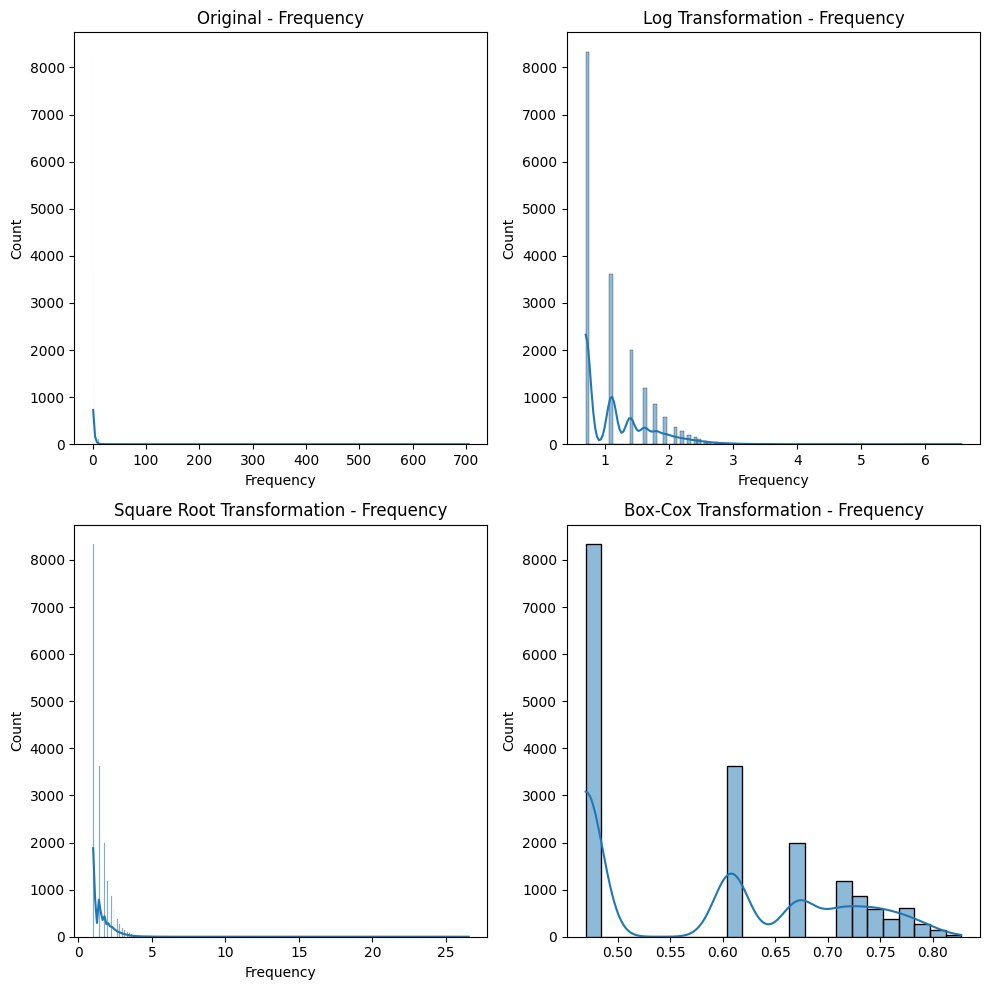

Skewness (Original): 84.5
Skewness (Log Transformation): 1.27
Skewness (Square Root Transformation): 4.4
Skewness (Box-Cox Transformation): 0.33


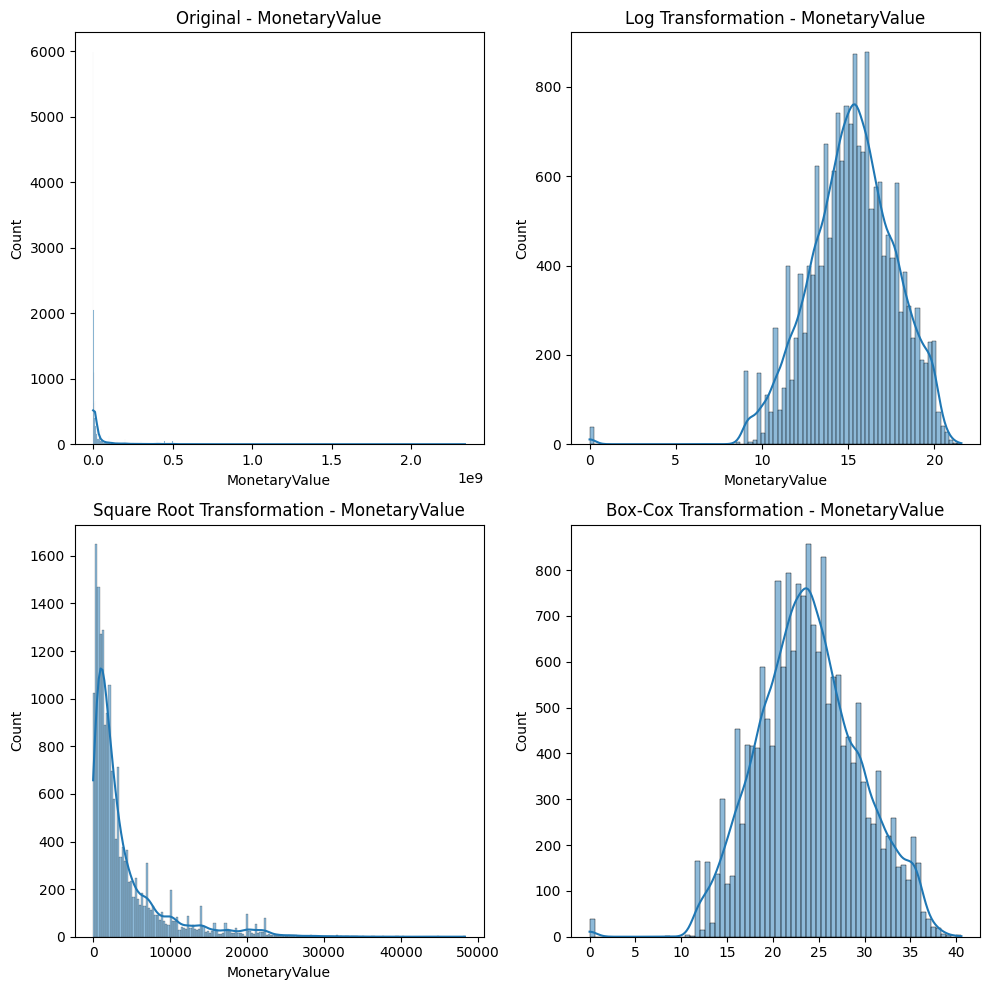

Skewness (Original): 5.63
Skewness (Log Transformation): -0.57
Skewness (Square Root Transformation): 2.48
Skewness (Box-Cox Transformation): 0.02


In [34]:
analyze_skewness('Recency', df_customers)
analyze_skewness('Frequency', df_customers)
analyze_skewness('MonetaryValue', df_customers)

In [35]:
# Tiến hành transform dữ liệu sau khi kiểm tra
df_customers_t = pd.DataFrame()
from scipy import stats
import numpy as np

# Sử dụng Box-Cox transformation
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'] + 1)[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'] + 1)[0]
df_customers_t['MonetaryValue'] = stats.boxcox(df_customers['MonetaryValue'] + 1)[0]

In [36]:
df_customers_t.head()


,Recency,Frequency,MonetaryValue
0,6.912599,0.469406,34.220127
1,3.152920,0.760414,28.969128
2,6.990687,0.709144,22.424635
3,4.545924,0.709144,37.339044
4,2.088884,0.802294,34.464385


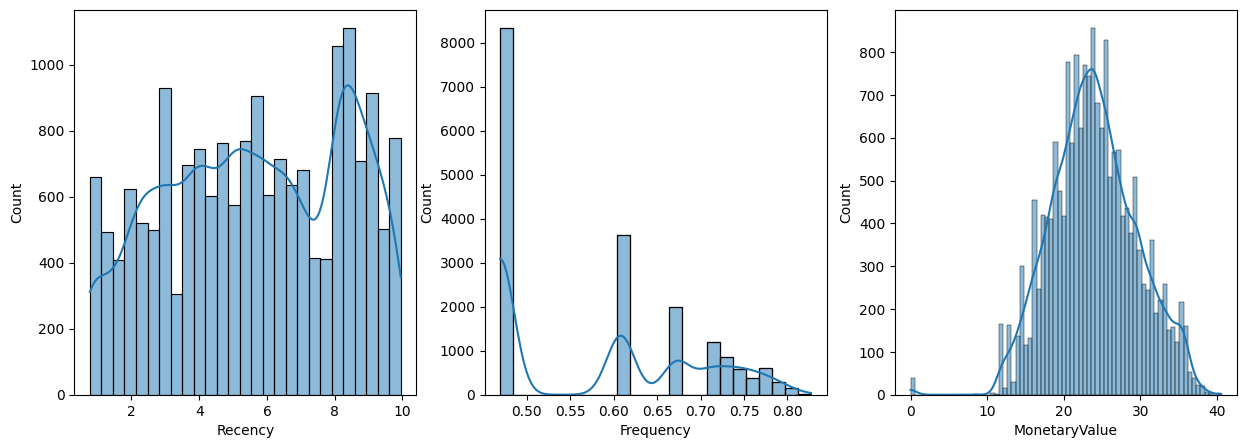

In [37]:

# Vẽ lại biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings('ignore')

# Vẽ phân phối
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_customers_t['Recency'], kde=True, ax=axs[0])
sns.histplot(df_customers_t['Frequency'], kde=True, ax=axs[1])
sns.histplot(df_customers_t['MonetaryValue'], kde=True, ax=axs[2])

# Hiển thị biểu đồ
plt.show()

# Scale dữ liệu, đưa vào mô hình KMeans


In [38]:

# Tiến hành scale dữ liệu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_customers_scaled = scaler.fit_transform(df_customers_t)


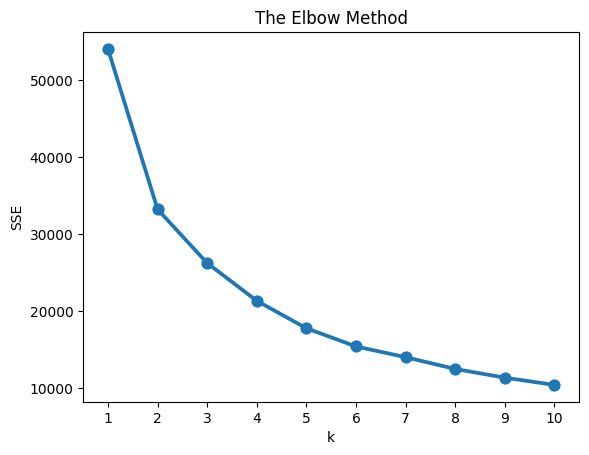

In [39]:
#Đưa dữ liệu vào Kmean

# Chọn số cụm bằng Elbow
# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_scaled)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


In [40]:
# => Chọn k = 3

In [41]:
model = KMeans(n_clusters=3, random_state = 42)
model.fit(df_customers_scaled)

KMeans(n_clusters=3, random_state=42)

# Áp dụng mô hình, phân cụm khách hàng, đánh giá cụm khách hàng


In [42]:
# Sau khi đã ra được model => Thêm 1 cột label để phân cụm vào dữ liệu gốc
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
Số CIF,,,,
100000000000,39,1,281000000,2
100000000001,8,7,39807000,1
100000000024,40,4,2515000,1
100000000044,16,4,820000000,1
100000000045,4,17,306272600,1


In [43]:
#Như vậy là có 3 cụm khách hàng đã được phân, để đánh giá xem các cụm này có tính chất như nào, ta sẽ đánh giá:
df_customers.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         40.24      1.27    1029969.50  6331
1         13.20      5.12   55911855.17  6867
2         51.62      1.40   73030229.94  4823

**Đánh giá:**
- Cụm 0: Mua hàng lâu, tần suất ít, giá trị ít => Đây là tệp khách hàng tệ, có tỷ lệ rời bỏ rất cao. Cần tìm hiểu lý do rời bỏ
- Cụm 1: Mua hàng gần đây, tần suất nhiều, giá trị trung bình nhiều => Đây là tệp khách hàng mới, rất tốt, cần có những chính sách chăm sóc phù hợp để cải thiện giá trị mua hàng hơn nữa
- Cụm 2: Mua hàng lâu nhất, tần suất ít, giá nhiều => Đây là tệp khách hàng từ lâu cực kì tiềm năng do có giá trị mua hàng rất lớn, tuy nhiên lại tần suất đang thấp -> Cần target lại nhóm khách hàng này để thúc đẩy mua hàng  